In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

warnings.filterwarnings('ignore')

1그룹 (239개): 총 공급 좌석수 0~39999  
2그룹 (195개) : 총 공급 좌석수 40000~459999  
3그룹 (154개) : 총 공급 좌석수 460000~3999999  
4그룹 (38개) : 총 공급 좌석수 4000000~6999999  
5그룹 (35개) : 총 공급 좌석수 7000000~15000000  
(아웃라이어: 극한직업 총 공급 좌석수 22523026)

In [98]:
g2 = pd.read_csv('prime_group2.csv')
len(g2)

195

In [99]:
film = pd.read_csv('../01.Data_Collection/films_final.csv')
film.sample()

,영화명,영화코드,개봉일,F-rated,장르,등급,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,감독1필모,감독1,감독1코드,감독1성별,감독2,감독2코드,감독2성별,감독3,감독3코드,감독3성별,감독4,감독4코드,감독4성별,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배우코드,배우성별,배우_대표역할,배우필모
606,미성년,20180825,2019-04-11,2,드라마,15세이상관람가,일반영화,"(주)영화사레드피터,(주)화이브라더스코리아",(주)쇼박스,27310,673,2493769950.000000,293258,856799740,98387,"바이러스(가제)|미성년|암수살인|1987|남한산성|당신, 거기 있어줄래요|검은 사제...",김윤석,10005276.000000,남자,-,-,-,-,-,-,-,-,-,"이보람, 김윤석",이보람,이보람,20301290,여자,시나리오(각본),미성년,"염정아,김소진,김혜준,박세진,김윤석,김희원,이희준,염혜란,이정은,미람,김혜윤,정이랑",염정아,10049852,여자,배우,"인생은 아름다워(가제)|시동|미성년|어쩌다, 결혼|뺑반|완벽한 타인|도청(가제)|장..."


In [153]:
test = film[(film['감독1성별']=='여자') | (film['감독2성별']=='여자') | (film['감독3성별']=='여자') | (film['감독4성별']=='여자')]

In [156]:
len(test[test['F-rated']==1])

8

In [157]:
test2 = film[~(film['감독1성별']=='여자') | (film['감독2성별']=='여자') | (film['감독3성별']=='여자') | (film['감독4성별']=='여자')]

In [158]:
len(test2)

576

In [159]:
len(test2[test2['F-rated']==2])

29

In [160]:
29/576

0.050347222222222224

In [100]:
g2 = g2.merge(film, how='left', on='영화명')
g2.sample()

,영화명,총공급좌석수,영화코드,개봉일,F-rated,장르,등급,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,감독1필모,감독1,감독1코드,감독1성별,감독2,감독2코드,감독2성별,감독3,감독3코드,감독3성별,감독4,감독4코드,감독4성별,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배우코드,배우성별,배우_대표역할,배우필모
145,유리정원,208043.000000,20164481,2017-10-25,3,"미스터리,드라마",12세이상관람가,독립/예술영화,준필름,(주)리틀빅픽쳐스,4480,332,160437700.000000,22752,60483700,8044,물비늘|젊은이의 양지|유리정원|마돈나|명왕성|레인보우|순환선|면도를 하다|가족시네마...,신수원,10040434.000000,여자,-,-,-,-,-,-,-,-,-,신수원,신수원,신수원,10040434,여자,감독,물비늘|젊은이의 양지|유리정원|마돈나|명왕성|레인보우|순환선|면도를 하다|가족시네마...,"문근영,김태훈,서태화,조예리,정애화,이승아,이기혁",문근영,10026674,여자,배우,"유리정원|사도|사랑 따윈 필요 없어|댄서의 순정|어린 신부|장화, 홍련|연애소설|길..."


In [101]:
g2.shape

(195, 42)

# F등급과 전국관객수, 총공급좌석수 단순 비교

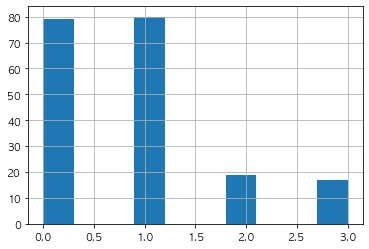

In [102]:
g2['F-rated'].hist()

In [103]:
g2.corr()

,총공급좌석수,영화코드,F-rated,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,감독1코드,작가코드,배우코드
총공급좌석수,1.000000,0.091731,-0.049668,0.650162,0.602232,0.379371,0.369182,0.513391,0.501946,-0.024738,-0.014102,-0.020421
영화코드,0.091731,1.000000,0.086682,0.149886,0.160889,0.202505,0.197412,0.200685,0.198278,0.117779,-0.005779,0.043338
F-rated,-0.049668,0.086682,1.000000,-0.004792,-0.051250,0.022385,0.025099,0.058916,0.060265,0.036251,0.088712,0.192841
상영횟수,0.650162,0.149886,-0.004792,1.000000,0.897024,0.886226,0.890625,0.840953,0.857321,0.074902,-0.028388,-0.043293
전국스크린수,0.602232,0.160889,-0.051250,0.897024,1.000000,0.749901,0.754794,0.640289,0.653454,0.082110,0.015206,-0.129938
전국매출액,0.379371,0.202505,0.022385,0.886226,0.749901,1.000000,0.998609,0.922770,0.930608,0.064770,-0.047333,0.025161
전국관객수,0.369182,0.197412,0.025099,0.890625,0.754794,0.998609,1.000000,0.912107,0.924630,0.068367,-0.041892,0.017489
서울매출액,0.513391,0.200685,0.058916,0.840953,0.640289,0.922770,0.912107,1.000000,0.994091,0.010448,-0.101782,0.080590
서울관객수,0.501946,0.198278,0.060265,0.857321,0.653454,0.930608,0.924630,0.994091,1.000000,0.012979,-0.096111,0.073843
감독1코드,-0.024738,0.117779,0.036251,0.074902,0.082110,0.064770,0.068367,0.010448,0.012979,1.000000,0.714828,0.213323


In [104]:
px.scatter(g2, x='총공급좌석수', y='전국관객수', color='F-rated', hover_name='영화명', trendline='ols')

총공급좌석수에 비해 전국관객수가 높은 것은 대부분 애니메이션이다.

# 애니메이션의 좌석판매율 확인

In [105]:
screen = pd.read_csv('../01.Data_Collection/screens_final.csv')
screen.shape

(39749, 20)

In [106]:
screen.sample()

,영화코드,영화명,개봉일,점유율집계일,개봉n일차,개봉n일차(int),상영횟수,상영점유율,상영점유율순위,스크린수,스크린점유율,스크린점유율순위,좌석수,좌석판매율,좌석점유율,좌석점유율순위,매출액,누적매출액,관객수,누적관객수
6158,20142403,늙은 자전거,2015-11-12,2019-10-07,1425 days 00:00:00.000000000,1425,2,0.018000,27,1,0.000000,30,572,0.500000,0.020000,19,6000,27466300,3,5844


In [107]:
g2_daily = g2.merge(screen, how='left', on='영화코드')
g2_daily.shape

(13152, 61)

In [108]:
g2_daily['영화명_x'].nunique()

195

In [109]:
g2_daily.sample()

,영화명_x,총공급좌석수,영화코드,개봉일_x,F-rated,장르,등급,영화구분,제작사,배급사,상영횟수_x,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,감독1필모,감독1,감독1코드,감독1성별,감독2,감독2코드,감독2성별,감독3,감독3코드,감독3성별,감독4,감독4코드,감독4성별,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배우코드,배우성별,배우_대표역할,배우필모,영화명_y,개봉일_y,점유율집계일,개봉n일차,개봉n일차(int),상영횟수_y,상영점유율,상영점유율순위,스크린수,스크린점유율,스크린점유율순위,좌석수,좌석판매율,좌석점유율,좌석점유율순위,매출액,누적매출액,관객수,누적관객수
5100,"무현, 두 도시 이야기",404194.000000,20162545,2016-10-26,0,다큐멘터리,15세이상관람가,독립/예술영화,"<무현, 두 도시 이야기> 제작위원회 ,엠앤씨에프",(주)모멘텀엔터테인먼트,9084,66,1517735100.000000,193578,521021200,63745,"시민 노무현|무현, 두 도시 이야기 : 파이널 컷|무현, 두 도시 이야기|품행제로|...",전인환,20153728.000000,남자,-,-,-,-,-,-,-,-,-,전인환,전인환,전인환,20153728,남자,감독,"시민 노무현|무현, 두 도시 이야기 : 파이널 컷|무현, 두 도시 이야기|품행제로|...","김원명,노무현",노무현,10008060,남자,배우,"시민 노무현|노무현과 바보들|무현, 두 도시 이야기 : 파이널 컷|노무현입니다|무현...","무현, 두 도시 이야기",2016-10-26,2016-12-10,45 days 00:00:00.000000000,45,37,0.380000,5,25,1.000000,5,3464,19.100000,0.120000,5,5749600,1478053000,660,188329


In [110]:
g2_daily = g2_daily.drop(['개봉일_x', '영화명_y'], axis=1).rename(columns={'F-rated':'F등급', '영화명_x':'영화명', '상영횟수_x':'전체상영횟수', '개봉일_y':'개봉일', '상영횟수_y':'일일상영횟수'})
g2_daily.columns

Index(['영화명', '총공급좌석수', '영화코드', 'F등급', '장르', '등급', '영화구분', '제작사', '배급사',
       '전체상영횟수', '전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수', '감독1필모', '감독1',
       '감독1코드', '감독1성별', '감독2', '감독2코드', '감독2성별', '감독3', '감독3코드', '감독3성별',
       '감독4', '감독4코드', '감독4성별', '작가', '대표작가', '대표작가(필명)', '작가코드', '작가성별',
       '작가_대표역할', '작가필모', '배우', '주연배우', '배우코드', '배우성별', '배우_대표역할', '배우필모',
       '개봉일', '점유율집계일', '개봉n일차', '개봉n일차(int)', '일일상영횟수', '상영점유율', '상영점유율순위',
       '스크린수', '스크린점유율', '스크린점유율순위', '좌석수', '좌석판매율', '좌석점유율', '좌석점유율순위', '매출액',
       '누적매출액', '관객수', '누적관객수'],
      dtype='object')

In [111]:
g2_daily['장르'].unique()

array(['공포(호러)', '다큐멘터리', '드라마', '범죄,코미디', '코미디', '드라마,다큐멘터리', '액션,드라마',
       '애니메이션', '드라마,코미디', '멜로/로맨스', '범죄,액션,드라마', '범죄,액션',
       '애니메이션,어드벤처,코미디,가족', '드라마,판타지', '애니메이션,어드벤처,코미디', '애니메이션,다큐멘터리',
       '애니메이션,판타지,어드벤처', '액션', '드라마,멜로/로맨스', '멜로/로맨스,드라마', '공연',
       '애니메이션,코미디,판타지,어드벤처,멜로/로맨스', '공포(호러),스릴러', '멜로/로맨스,코미디',
       '미스터리,스릴러', '다큐멘터리,드라마', '기타', '판타지,가족', '스릴러,코미디', '미스터리,드라마',
       '애니메이션,가족', '스릴러', '가족,멜로/로맨스,코미디', '드라마,범죄,미스터리', '미스터리,공포(호러)',
       '드라마,범죄,스릴러', '코미디,드라마', '드라마,가족', '공포(호러),미스터리', '사극,액션',
       '코미디,멜로/로맨스', '코미디,액션', '액션,어드벤처', '드라마,미스터리', '미스터리,판타지',
       '다큐멘터리,액션', '범죄,드라마', '스릴러,드라마', '가족,드라마'], dtype=object)

In [112]:
g2_daily['장르_1번째'] = g2_daily['장르'].apply(lambda x: x.split(',')[0].strip())
g2_daily['장르_1번째'].unique()

array(['공포(호러)', '다큐멘터리', '드라마', '범죄', '코미디', '액션', '애니메이션', '멜로/로맨스',
       '공연', '미스터리', '기타', '판타지', '스릴러', '가족', '사극'], dtype=object)

In [113]:
ani = g2_daily[g2_daily['장르_1번째']=='애니메이션']
len(ani)

2507

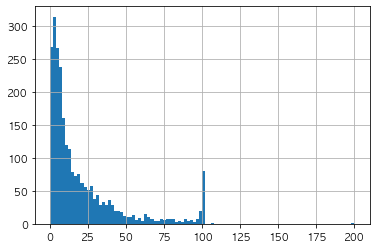

In [114]:
ani['좌석판매율'].hist(bins=100)

In [115]:
ani['좌석판매율'].describe()

count   2507.000000
mean      20.306382
std       24.996946
min        0.000000
25%        4.300000
50%       10.000000
75%       26.200000
max      200.000000
Name: 좌석판매율, dtype: float64

In [116]:
# 좌석판매율이 100 넘는 것들.. 온갖 추측 중
ani[ani['좌석판매율']>100]

,영화명,총공급좌석수,영화코드,F등급,장르,등급,영화구분,제작사,배급사,전체상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,감독1필모,감독1,감독1코드,감독1성별,감독2,감독2코드,감독2성별,감독3,감독3코드,감독3성별,감독4,감독4코드,감독4성별,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배우코드,배우성별,배우_대표역할,배우필모,개봉일,점유율집계일,개봉n일차,개봉n일차(int),일일상영횟수,상영점유율,상영점유율순위,스크린수,스크린점유율,스크린점유율순위,좌석수,좌석판매율,좌석점유율,좌석점유율순위,매출액,누적매출액,관객수,누적관객수,장르_1번째
3418,다이노 타임,75815.000000,20100211,1,"애니메이션,어드벤처,코미디",전체관람가,일반영화,주식회사 토이온,씨제이이앤엠(주),6743,430,2099683100.000000,283300,405724600,52818,다이노 타임|엄마,최윤석,20167014.000000,남자,존 카프카,10068301.0,남자,-,-,-,-,-,-,"박재우, 제임스 그레코, 재커리 로젠블라트, 애덤 비첸",박재우,박재우,20229507,남자,시나리오(각본),극장판 뽀잉: 슈퍼 변신의 비밀|슈퍼레이서 엔지|다이노 타임,"멜라니 그리피스,제인 린치,윌리엄 볼드윈,스티븐 볼드윈,롭 슈나이더,유리 로웬탈",멜라니 그리피스,10025920,여자,배우,다크 투어리스트|다이노 타임|새미의 어드벤쳐|쉐이드|템포|세실 B. 디멘티드|러빙 ...,2015-04-30,2015-04-21,-9 days +00:00:00.000000000,-9,1,0.018000,17,1,0.100000,13,202,107.900000,0.010000,16,1744000,3884000,218,432,애니메이션
4388,레드슈즈,338944.000000,20198323,1,"애니메이션,코미디,판타지,어드벤처,멜로/로맨스",전체관람가,일반영화,(주)싸이더스,(주)넥스트엔터테인먼트월드(NEW),20363,717,6098956190.000000,816906,1380911550,201881,레드슈즈|다이노 타임|마당을 나온 암탉|고양이: 죽음을 보는 두 개의 눈|차우|원더...,홍성호,10089591.000000,남자,-,-,-,-,-,-,-,-,-,홍성호,홍성호,홍성호,10089591,남자,VFX 슈퍼바이저,레드슈즈|다이노 타임|마당을 나온 암탉|고양이: 죽음을 보는 두 개의 눈|차우|원더...,"클로이 모레츠,샘 클라플린,지나 거손,패트릭 워버튼,짐 래쉬,아바 콜커",클로이 모레츠,20112356,여자,배우,아담스 패밀리|레드슈즈|우먼 인 할리우드|마담 싸이코|서스페리아|브레인 온 파이어|...,2019-07-25,2019-06-21,-34 days +00:00:00.000000000,-34,1,0.015000,18,1,0.100000,17,91,200.000000,0.000000,26,910000,910000,182,182,애니메이션
8648,언더독,297126.000000,20186324,0,애니메이션,전체관람가,일반영화,(주)오돌또기,(주)넥스트엔터테인먼트월드(NEW),10753,612,1485934830.000000,193484,420191450,50913,언더독|26년|마당을 나온 암탉|사람이되어라|별별 이야기 2-여섯 빛깔 무지개|별별...,오성윤,20112890.000000,남자,이춘백,10057737.0,남자,-,-,-,-,-,-,오성윤,오성윤,오성윤,20112890,남자,감독,언더독|26년|마당을 나온 암탉|사람이되어라|별별 이야기 2-여섯 빛깔 무지개|별별...,"도경수,박소담,박철민,강석,이준혁,연지원,전숙경,박중금",도경수,20209526,남자,배우,언더독|스윙키즈|신과함께-인과 연|신과함께-죄와 벌|7호실|형|순정|카트,2019-01-16,2019-03-31,74 days 00:00:00.000000000,74,4,0.056000,16,4,0.200000,15,608,100.800000,0.020000,14,4904000,1488861830,613,193837,애니메이션


# OLS Regression

In [118]:
from statsmodels.formula.api import ols

In [119]:
# 장르 - 좌석판매율
ols('좌석판매율~C(장르_1번째)', g2_daily).fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.397
Date:                Sun, 08 Dec 2019   Prob (F-statistic):           1.59e-05
Time:                        17:56:31   Log-Likelihood:                -62624.
No. Observations:               13152   AIC:                         1.253e+05
Df Residuals:                   13137   BIC:                         1.254e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.8224      3.071      3.199      0.001       3.804      15.841
C(장르_1번째)[T.공연]        28.3589      7.715      3.676      0.000      13.237      43.481
C(장르_1번째)[T.공포(호러)]    10.2907      3.949      2.606      0.009       2.551      18.031
C(장르_1번째)[T.기타]        19.3538      6.899      2.805      0.005       5.832      32.876
C(장르_1번째)[T.다큐멘터리]     12.1069      3.102      3.902      0.000       6.026      18.188
C(장르_1번째)[T.드라마]       10.8219      3.100      3.491      0.000       4.746      16.898
C(장르_1번째)[T.멜로/로맨스]     9.1192      3.234      2.820      0.005       2.781      15.458
C(장르_1번째)[T.미스터리]       7.6294      3.739      2.040      0.041       0.300      14.959
C(장르_1번째)[T.범죄]         7.0202      3.791      1.852      0.064      -0.412      14.452
C(장르_1번째)[T.사극]        23.7634      6.899      3.445      0.001      10.241      37.286
C(장르_1번째)[T.스릴러]        9.7378      3.768      2.584      0.010       2.352      17.124
C(장르_1번째)[T.애니메이션]     10.4840      3.122      3.358      0.001       4.364      16.604
C(장르_1번째)[T.액션]         6.3053      3.993      1.579      0.114      -1.521      14.132
C(장르_1번째)[T.코미디]        8.5774      3.413      2.513      0.012       1.888      15.267
C(장르_1번째)[T.판타지]        9.2288      4.355      2.119      0.034       0.692      17.766
==============================================================================
Omnibus:                     4543.564   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12177.275
Skew:                           1.912   Prob(JB):                         0.00
Kurtosis:                       5.756   Cond. No.                         56.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
# 장르,F등급 - 좌석판매율
ols("좌석판매율~C(장르_1번째) * F등급", g2_daily).fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.814
Date:                Sun, 08 Dec 2019   Prob (F-statistic):           7.06e-14
Time:                        17:56:32   Log-Likelihood:                -62590.
No. Observations:               13152   AIC:                         1.252e+05
Df Residuals:                   13127   BIC:                         1.254e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.0537      3.844      1.835      0.067      -0.481      14.588
C(장르_1번째)[T.공연]            31.1275      8.040      3.872      0.000      15.368      46.887
C(장르_1번째)[T.공포(호러)]        24.7996      6.432      3.856      0.000      12.192      37.408
C(장르_1번째)[T.기타]             9.1634      3.469      2.642      0.008       2.365      15.962
C(장르_1번째)[T.다큐멘터리]         13.2209      3.894      3.396      0.001       5.589      20.853
C(장르_1번째)[T.드라마]           10.6524      3.895      2.735      0.006       3.017      18.288
C(장르_1번째)[T.멜로/로맨스]        13.5302      4.177      3.239      0.001       5.342      21.718
C(장르_1번째)[T.미스터리]          10.9467      5.259      2.081      0.037       0.638      21.256
C(장르_1번째)[T.범죄]            11.6442      4.729      2.462      0.014       2.375      20.913
C(장르_1번째)[T.사극]            26.5320      7.264      3.652      0.000      12.293      40.771
C(장르_1번째)[T.스릴러]            9.0202      5.132      1.758      0.079      -1.040      19.080
C(장르_1번째)[T.애니메이션]         13.7226      3.951      3.473      0.001       5.977      21.468
C(장르_1번째)[T.액션]             9.0739      4.611      1.968      0.049       0.035      18.112
C(장르_1번째)[T.코미디]           10.6346      4.275      2.488      0.013       2.256      19.013
C(장르_1번째)[T.판타지]           11.9975      4.927      2.435      0.015       2.340      21.655
F등급                         3.7957      3.183      1.193      0.233      -2.443      10.034
C(장르_1번째)[T.공연]:F등급     -1.937e-15   2.26e-15     -0.858      0.391   -6.37e-15    2.49e-15
C(장르_1번째)[T.공포(호러)]:F등급   -19.0581      6.686     -2.850      0.004     -32.164      -5.952
C(장르_1번째)[T.기타]:F등급         9.1634      3.469      2.642      0.008       2.365      15.962
C(장르_1번째)[T.다큐멘터리]:F등급     -2.1354      3.212     -0.665      0.506      -8.432       4.161
C(장르_1번째)[T.드라마]:F등급       -1.1635      3.210     -0.362      0.717      -7.455       5.128
C(장르_1번째)[T.멜로/로맨스]:F등급    -4.8609      3.290     -1.478      0.140     -11.309       1.588
C(장르_1번째)[T.미스터리]:F등급      -4.2084      3.854     -1.092      0.275     -11.763       3.346
C(장르_1번째)[T.범죄]:F등급        -7.8032      4.748     -1.644      0.100     -17.110       1.503
C(장르_1번째)[T.사극]:F등급      2.457e-15   7.86e-16      3.126      0.002    9.16e-16       4e-15
C(장르_1번째)[T.스릴러]:F등급        2.1203      5.455      0.389      0.697      -8.571      12.812
C(장르_1번째)[T.애니메이션]:F등급     -4.3120      3.280     -1.315      0.189     -10.741       2.117
C(장르_1번째)[T.액션]:F등급              0          0        nan        nan           0           0
C(장르_1번째)[T.코미디]:F등급       -2.6743      3.650     -0.733      0.464      -9.829       4.481
C(장르_1번째)[T.판타지]:F등급             0          0        nan        nan           0           0
===============================================

In [121]:
# 배우성별 - 좌석판매율
ols('좌석판매율~C(배우성별)', g2_daily).fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3525
Date:                Sun, 08 Dec 2019   Prob (F-statistic):              0.553
Time:                        17:56:33   Log-Likelihood:                -62647.
No. Observations:               13152   AIC:                         1.253e+05
Df Residuals:                   13150   BIC:                         1.253e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        20.7813      0.342     60.709      0.000      20.110      21.452
C(배우성별)[T.여자]    -0.2938      0.495     -0.594      0.553      -1.264       0.676
==============================================================================
Omnibus:                     4541.585   Durbin-Watson:                   0.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12142.800
Skew:                           1.913   Prob(JB):                         0.00
Kurtosis:                       5.741   Cond. No.                         2.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
# 감독성별 - 좌석판매율
ols('좌석판매율~C(감독1성별)', g2_daily).fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     53.15
Date:                Sun, 08 Dec 2019   Prob (F-statistic):           3.27e-13
Time:                        17:56:34   Log-Likelihood:                -62621.
No. Observations:               13152   AIC:                         1.252e+05
Df Residuals:                   13150   BIC:                         1.253e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         19.7420      0.276     71.592      0.000      19.201      20.283
C(감독1성별)[T.여자]     4.4973      0.617      7.290      0.000       3.288       5.706
==============================================================================
Omnibus:                     4545.304   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12187.601
Skew:                           1.913   Prob(JB):                         0.00
Kurtosis:                       5.758   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
# 작가성별 - 좌석판매율
ols('좌석판매율~C(작가성별)', g2_daily).fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     41.30
Date:                Sun, 08 Dec 2019   Prob (F-statistic):           1.35e-10
Time:                        17:56:34   Log-Likelihood:                -62627.
No. Observations:               13152   AIC:                         1.253e+05
Df Residuals:                   13150   BIC:                         1.253e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        19.5608      0.299     65.517      0.000      18.976      20.146
C(작가성별)[T.여자]     3.4091      0.530      6.426      0.000       2.369       4.449
==============================================================================
Omnibus:                     4543.868   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12182.960
Skew:                           1.912   Prob(JB):                         0.00
Kurtosis:                       5.758   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
# 감독성별,작가성별,배우성별 - 좌석판매율
ols('좌석판매율~C(감독1성별) + C(작가성별) + C(배우성별)', g2_daily).fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     19.38
Date:                Sun, 08 Dec 2019   Prob (F-statistic):           1.55e-12
Time:                        17:56:36   Log-Likelihood:                -62619.
No. Observations:               13152   AIC:                         1.252e+05
Df Residuals:                   13148   BIC:                         1.253e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         19.8850      0.379     52.419      0.000      19.141      20.629
C(감독1성별)[T.여자]     3.6235      0.900      4.024      0.000       1.859       5.388
C(작가성별)[T.여자]      1.1917      0.767      1.554      0.120      -0.312       2.695
C(배우성별)[T.여자]     -0.7226      0.501     -1.442      0.149      -1.705       0.259
==============================================================================
Omnibus:                     4541.875   Durbin-Watson:                   0.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12176.661
Skew:                           1.911   Prob(JB):                         0.00
Kurtosis:                       5.759   Cond. No.                         5.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

감독이 여성일 때 좌석판매율이 더 높음

In [166]:
ols('좌석판매율~영화구분', g2_daily).fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     69.94
Date:                Sun, 08 Dec 2019   Prob (F-statistic):           6.72e-17
Time:                        20:14:22   Log-Likelihood:                -62608.
No. Observations:               13151   AIC:                         1.252e+05
Df Residuals:                   13149   BIC:                         1.252e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       19.4007      0.288     67.427      0.000      18.837      19.965
영화구분[T.일반영화]     4.6670      0.558      8.363      0.000       3.573       5.761
==============================================================================
Omnibus:                     4594.967   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12479.886
Skew:                           1.927   Prob(JB):                         0.00
Kurtosis:                       5.813   Cond. No.                         2.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
ols('총공급좌석수~영화구분', g2_daily).fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 총공급좌석수   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     756.0
Date:                Sun, 08 Dec 2019   Prob (F-statistic):          7.19e-162
Time:                        20:15:50   Log-Likelihood:            -1.6934e+05
No. Observations:               13151   AIC:                         3.387e+05
Df Residuals:                   13149   BIC:                         3.387e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.313e+05    963.393    136.315      0.000    1.29e+05    1.33e+05
영화구분[T.일반영화]  5.138e+04   1868.518     27.495      0.000    4.77e+04     5.5e+04
==============================================================================
Omnibus:                     1593.895   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2240.169
Skew:                           1.002   Prob(JB):                         0.00
Kurtosis:                       3.270   Cond. No.                         2.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 개봉 2일차 성적 비교
보통 개봉을 목요일에 하므로 개봉 첫 주 토요일이 2일차

In [125]:
g2_daily.columns

Index(['영화명', '총공급좌석수', '영화코드', 'F등급', '장르', '등급', '영화구분', '제작사', '배급사',
       '전체상영횟수', '전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수', '감독1필모', '감독1',
       '감독1코드', '감독1성별', '감독2', '감독2코드', '감독2성별', '감독3', '감독3코드', '감독3성별',
       '감독4', '감독4코드', '감독4성별', '작가', '대표작가', '대표작가(필명)', '작가코드', '작가성별',
       '작가_대표역할', '작가필모', '배우', '주연배우', '배우코드', '배우성별', '배우_대표역할', '배우필모',
       '개봉일', '점유율집계일', '개봉n일차', '개봉n일차(int)', '일일상영횟수', '상영점유율', '상영점유율순위',
       '스크린수', '스크린점유율', '스크린점유율순위', '좌석수', '좌석판매율', '좌석점유율', '좌석점유율순위', '매출액',
       '누적매출액', '관객수', '누적관객수', '장르_1번째'],
      dtype='object')

In [126]:
day2 = g2_daily[g2_daily['개봉n일차(int)']==2]

In [127]:
len(day2)

195

In [128]:
day2.corr()

,총공급좌석수,영화코드,F등급,전체상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,감독1코드,작가코드,배우코드,개봉n일차(int),일일상영횟수,상영점유율,상영점유율순위,스크린수,스크린점유율,스크린점유율순위,좌석수,좌석판매율,좌석점유율,좌석점유율순위,매출액,누적매출액,관객수,누적관객수
총공급좌석수,1.000000,0.091731,-0.049668,0.650162,0.602232,0.379371,0.369182,0.513391,0.501946,-0.024738,-0.014102,-0.020421,nan,0.676218,0.495046,-0.451358,0.624657,0.529979,-0.399229,0.651364,0.216105,0.654892,-0.446054,0.350662,0.411052,0.336055,0.401814
영화코드,0.091731,1.000000,0.086682,0.149886,0.160889,0.202505,0.197412,0.200685,0.198278,0.117779,-0.005779,0.043338,nan,0.086366,0.061925,-0.004393,0.155441,0.043682,0.008730,0.079808,0.088177,0.035610,-0.005363,0.156444,0.186143,0.148669,0.179196
F등급,-0.049668,0.086682,1.000000,-0.004792,-0.051250,0.022385,0.025099,0.058916,0.060265,0.036251,0.088712,0.192841,nan,-0.065444,-0.069485,0.067711,-0.061871,-0.085770,0.096164,-0.061777,0.060210,-0.066324,0.070009,0.014855,-0.010928,0.014080,-0.004260
전체상영횟수,0.650162,0.149886,-0.004792,1.000000,0.897024,0.886226,0.890625,0.840953,0.857321,0.074902,-0.028388,-0.043293,nan,0.902102,0.691116,-0.526870,0.896455,0.777118,-0.528355,0.891225,0.565512,0.882064,-0.528268,0.800839,0.752871,0.801332,0.772014
전국스크린수,0.602232,0.160889,-0.051250,0.897024,1.000000,0.749901,0.754794,0.640289,0.653454,0.082110,0.015206,-0.129938,nan,0.933771,0.691912,-0.571248,0.987454,0.831796,-0.602370,0.914698,0.445110,0.908269,-0.570704,0.710867,0.706691,0.712994,0.726407
전국매출액,0.379371,0.202505,0.022385,0.886226,0.749901,1.000000,0.998609,0.922770,0.930608,0.064770,-0.047333,0.025161,nan,0.729219,0.566784,-0.403458,0.730077,0.634956,-0.381246,0.739513,0.715899,0.722007,-0.417862,0.876133,0.879989,0.873889,0.889873
전국관객수,0.369182,0.197412,0.025099,0.890625,0.754794,0.998609,1.000000,0.912107,0.924630,0.068367,-0.041892,0.017489,nan,0.732775,0.571745,-0.404532,0.735670,0.643729,-0.386690,0.741942,0.708896,0.724710,-0.418691,0.874067,0.865657,0.873542,0.879690
서울매출액,0.513391,0.200685,0.058916,0.840953,0.640289,0.922770,0.912107,1.000000,0.994091,0.010448,-0.101782,0.080590,nan,0.643699,0.478936,-0.371127,0.627091,0.530452,-0.327224,0.657150,0.725617,0.639654,-0.392088,0.772875,0.823815,0.762578,0.816134
서울관객수,0.501946,0.198278,0.060265,0.857321,0.653454,0.930608,0.924630,0.994091,1.000000,0.012979,-0.096111,0.073843,nan,0.654627,0.494886,-0.378966,0.642756,0.557029,-0.341567,0.664607,0.717118,0.646238,-0.398943,0.774277,0.804515,0.765848,0.802751
감독1코드,-0.024738,0.117779,0.036251,0.074902,0.082110,0.064770,0.068367,0.010448,0.012979,1.000000,0.714828,0.213323,nan,0.030769,0.019184,-0.030288,0.080823,0.041095,-0.066772,0.028044,0.064626,0.013939,-0.034389,0.079921,0.044143,0.083103,0.057365


In [129]:
# 애니 제외
day2_exc_ani = day2[day2['장르_1번째']=='애니메이션']

In [130]:
day2_exc_ani.corr()

,총공급좌석수,영화코드,F등급,전체상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,감독1코드,작가코드,배우코드,개봉n일차(int),일일상영횟수,상영점유율,상영점유율순위,스크린수,스크린점유율,스크린점유율순위,좌석수,좌석판매율,좌석점유율,좌석점유율순위,매출액,누적매출액,관객수,누적관객수
총공급좌석수,1.000000,0.343012,-0.064647,0.770718,0.679520,0.637736,0.634374,0.726163,0.711814,-0.110710,-0.287186,0.124666,nan,0.741670,0.513637,-0.474666,0.734361,0.571609,-0.388015,0.718841,0.169580,0.712572,-0.459205,0.548126,0.474155,0.537834,0.461844
영화코드,0.343012,1.000000,-0.050029,0.522116,0.567388,0.487034,0.478667,0.456169,0.449382,0.083260,0.037251,0.283709,nan,0.447796,0.356332,-0.261290,0.560620,0.362087,-0.246166,0.389774,0.103769,0.354576,-0.240183,0.379736,0.437208,0.369286,0.423803
F등급,-0.064647,-0.050029,1.000000,0.141446,0.135028,0.212424,0.219253,0.197553,0.195493,-0.021875,0.047200,0.143637,nan,0.138999,0.139514,-0.248135,0.081913,0.177304,-0.223855,0.144410,0.130635,0.170699,-0.258359,0.233586,0.220521,0.232067,0.234435
전체상영횟수,0.770718,0.522116,0.141446,1.000000,0.914856,0.948293,0.946274,0.951861,0.931185,0.064302,-0.225915,0.161145,nan,0.874816,0.661743,-0.724930,0.923116,0.778188,-0.653887,0.826756,0.481833,0.823486,-0.716348,0.783899,0.732336,0.778534,0.724216
전국스크린수,0.679520,0.567388,0.135028,0.914856,1.000000,0.869477,0.863147,0.830528,0.795567,0.216239,-0.071921,0.094522,nan,0.832573,0.540296,-0.730347,0.942256,0.695038,-0.672804,0.788645,0.389559,0.775325,-0.699881,0.714602,0.766527,0.708891,0.756901
전국매출액,0.637736,0.487034,0.212424,0.948293,0.869477,1.000000,0.999497,0.967853,0.948495,0.073988,-0.124233,0.177395,nan,0.783371,0.612514,-0.695146,0.853948,0.752042,-0.622146,0.719229,0.571284,0.716851,-0.684290,0.780256,0.813099,0.775988,0.808502
전국관객수,0.634374,0.478667,0.219253,0.946274,0.863147,0.999497,1.000000,0.968367,0.950655,0.061467,-0.125055,0.176040,nan,0.780063,0.607466,-0.694746,0.848601,0.749955,-0.621356,0.716954,0.567762,0.715337,-0.685483,0.774550,0.806603,0.770490,0.803061
서울매출액,0.726163,0.456169,0.197553,0.951861,0.830528,0.967853,0.968367,1.000000,0.994850,0.011117,-0.231000,0.245812,nan,0.776045,0.597539,-0.695439,0.836972,0.749648,-0.619821,0.715859,0.507606,0.711001,-0.685125,0.733453,0.748677,0.725600,0.740872
서울관객수,0.711814,0.449382,0.195493,0.931185,0.795567,0.948495,0.950655,0.994850,1.000000,-0.032154,-0.238274,0.260461,nan,0.744058,0.574015,-0.675671,0.807380,0.740877,-0.602188,0.683011,0.489017,0.674809,-0.667998,0.699207,0.712504,0.690032,0.704275
감독1코드,-0.110710,0.083260,-0.021875,0.064302,0.216239,0.073988,0.061467,0.011117,-0.032154,1.000000,0.137125,0.085718,nan,0.112313,0.078588,-0.083151,0.211511,0.093231,-0.132980,0.106381,0.165483,0.097933,-0.043892,0.182447,0.267823,0.185523,0.262115


개봉 2일차에 여성영화의 좌석판매율이 더 크다. (양의 상관관계)

# 개봉 5일차 데이터 두 번 들어간 영화 확인

In [131]:
day5 = g2_daily[g2_daily['개봉n일차(int)']==5]

In [132]:
len(day5)

196

In [133]:
day5['영화명'].value_counts()

산다                         2
0.0MHz                     1
출국                         1
밤의 해변에서 혼자                 1
트와이스랜드                     1
검은손                        1
1991, 봄                    1
로망                         1
달빛궁궐                       1
뚜르: 내 생애 최고의 49일           1
질투의 역사                     1
더 테이블                      1
춘희막이                       1
그랜드파더                      1
젝스키스 에이틴                   1
런닝맨 : 풀룰루의 역습              1
빅뱅 메이드                     1
명량: 회오리 바다를 향하여            1
무현, 두 도시 이야기               1
5.18 힌츠페터 스토리              1
제자도 - 제자,옥한흠2              1
B급 며느리                     1
미스 프레지던트                   1
극장판 공룡메카드: 타이니소어의 섬        1
마리안느와 마가렛                  1
이타미 준의 바다                  1
어른도감                       1
메소드                        1
저수지 게임                     1
마이 페어 웨딩                   1
쓰리 썸머 나잇                   1
다시, 벚꽃                     1
임을 위한 행진곡                  1
폴란드로 간 아이들                 1
그물            

In [84]:
day5[day5['영화명']=='산다']

,영화명,총공급좌석수,영화코드,F-rated,장르,등급,영화구분,제작사,배급사,전체상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,감독1필모,감독1,감독1코드,감독1성별,감독2,감독2코드,감독2성별,감독3,감독3코드,감독3성별,감독4,감독4코드,감독4성별,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배우코드,배우성별,배우_대표역할,배우필모,개봉일,점유율집계일,개봉n일차,개봉n일차(int),일일상영횟수,상영점유율,상영점유율순위,스크린수,스크린점유율,스크린점유율순위,좌석수,좌석판매율,좌석점유율,좌석점유율순위,매출액,누적매출액,관객수,누적관객수,장르_1번째,F등급
6436,산다,44082.000000,20148449,0,드라마,청소년관람불가,독립/예술영화,"세컨드윈드 필름,(유)산다문화산업전문회사",(주)리틀빅픽쳐스,604,33,29754200.000000,3829,21686200,2673,파고|이 세상에 없는|춘몽|오늘영화|산다|일주일|무산일기|시|주리|두한에게|125 ...,박정범,10029163.000000,남자,-,-,-,-,-,-,-,-,-,박정범,박정범,박정범,10029163,남자,감독,파고|이 세상에 없는|춘몽|오늘영화|산다|일주일|무산일기|시|주리|두한에게|125 ...,"박정범,이승연,이재동,이재복,이찬호,장민애,전용선,전지현,고상훈,정동구,서진원,서호...",박정범,10029163,남자,배우,파고|이 세상에 없는|춘몽|오늘영화|산다|일주일|무산일기|시|주리|두한에게|125 ...,2015-05-21,2015-05-26,5 days 00:00:00.000000000,5,47,0.800000,4,29,2.000000,4,4837,2.400000,0.210000,4,852500,23683700,114,3157,드라마,0
6437,산다,44082.000000,20148449,0,드라마,청소년관람불가,독립/예술영화,"세컨드윈드 필름,(유)산다문화산업전문회사",(주)리틀빅픽쳐스,604,33,29754200.000000,3829,21686200,2673,파고|이 세상에 없는|춘몽|오늘영화|산다|일주일|무산일기|시|주리|두한에게|125 ...,박정범,10029163.000000,남자,-,-,-,-,-,-,-,-,-,박정범,박정범,박정범,10029163,남자,감독,파고|이 세상에 없는|춘몽|오늘영화|산다|일주일|무산일기|시|주리|두한에게|125 ...,"박정범,이승연,이재동,이재복,이찬호,장민애,전용선,전지현,고상훈,정동구,서진원,서호...",박정범,10029163,남자,배우,파고|이 세상에 없는|춘몽|오늘영화|산다|일주일|무산일기|시|주리|두한에게|125 ...,2015-05-21,2015-05-26,5 days 00:00:00.000000000,5,1,0.017000,21,1,0.100000,18,143,11.900000,0.010000,19,51000,1331000,17,349,드라마,0


6437번은 drop

In [134]:
g2_daily = g2_daily.drop([6437], axis=0)

In [136]:
#g2_daily.to_csv('prime_group2_daily.csv', index=False)

In [135]:
g2_daily['개봉n일차(int)'].value_counts()

 0       195
 2       195
 6       195
 1       195
 4       195
 3       195
 5       195
 9       194
 11      193
 7       193
 8       193
 12      192
 13      191
 10      191
 15      186
 14      186
 16      180
 17      179
 18      178
 19      175
 20      175
 21      159
 22      154
 23      153
 25      152
 24      151
 27      147
 26      146
 28      138
 33      134
 29      133
 30      131
 32      130
 34      130
 31      127
 35      118
 39      115
 36      115
 40      113
 38      111
 37      111
 41      110
-1       102
 43       99
 45       99
 42       96
 47       96
 44       93
 48       92
 46       91
 50       83
-2        81
 52       79
 49       79
-7        78
 55       77
 53       77
 54       75
 51       73
-6        70
 56       68
 57       66
 58       65
-8        64
 59       63
-3        62
-9        61
 62       61
 60       60
 64       59
 61       57
 63       55
 68       52
 65       49
 66       48
 67       47
 69       47

2그룹에 있는 모든 영화 195개가 개봉 0~6일차에 1번 이상 상영했다.  
0~6일차만 남겨서 비교해보자.

# 개봉 n일차 좌석판매율

In [141]:
# 영화별
px.line(g2_daily, x='개봉n일차(int)', y='좌석판매율', color='영화명', range_x=[0,30], range_y=[0,100])

In [146]:
sales = g2_daily[g2_daily['개봉n일차(int)']>=0].groupby(['F등급', '개봉n일차(int)'])['좌석판매율'].mean().reset_index()
sales

,F등급,개봉n일차(int),좌석판매율
0,0,0,10.983544
1,0,1,9.188608
2,0,2,11.279747
3,0,3,12.768354
4,0,4,8.977215
5,0,5,7.200000
6,0,6,8.320253
7,0,7,11.001266
8,0,8,10.966667
9,0,9,11.885897


In [162]:
# F등급별 평균

px.line(sales, x='개봉n일차(int)', y='좌석판매율', color='F등급', range_x=[0,40], range_y=[0,100])

In [163]:
# F등급별 중간값
sales2 = g2_daily[g2_daily['개봉n일차(int)']>=0].groupby(['F등급', '개봉n일차(int)'])['좌석판매율'].median().reset_index()
px.line(sales2, x='개봉n일차(int)', y='좌석판매율', color='F등급', range_x=[0,40], range_y=[0,100])

In [171]:
g2_daily['장르_1번째'].pie

AttributeError: 'Series' object has no attribute 'pie'